In [14]:
import pandas as pd
import numpy as np
import glob
import re
from Functions import *

In [19]:
foldername = "../data/Vertical_EME - no RDL/"
# 获取所有匹配的文件
filename_list = glob.glob(foldername + 'len_taper_RDL-*.txt')
filename_list

['../data/Vertical_EME - no RDL/len_taper_RDL-200.txt',
 '../data/Vertical_EME - no RDL/len_taper_RDL-600.txt',
 '../data/Vertical_EME - no RDL/len_taper_RDL-400.txt',
 '../data/Vertical_EME - no RDL/len_taper_RDL-300.txt',
 '../data/Vertical_EME - no RDL/len_taper_RDL-100.txt',
 '../data/Vertical_EME - no RDL/len_taper_RDL-500.txt',
 '../data/Vertical_EME - no RDL/len_taper_RDL-700.txt']

In [16]:
# len_prop_arr = np.linspace(200,1500,651)

len_prop_arr = np.linspace(100,3500,681)

In [20]:
# 创建一个空的DataFrame用于存储所有数据
df_data = pd.DataFrame()
file_list = []
# 遍历每个文件
for filename in filename_list:
    # 使用正则表达式提取xxx数字部分
    match = re.search(r'len_taper_RDL-(\d+)\.txt', filename)
    len_taper = int(match.group(1))
    file_list.append((len_taper,filename))

file_list.sort(key=lambda file: file[0])

df_data['len_prop'] = len_prop_arr
for len_taper, file in file_list:

    # 读取文件内容，假设每行一个数据点
    data = pd.read_csv(file, header=None, names=[len_taper])

    # 将数据合并到主DataFrame中
    if df_data.empty:
        df_data = data
    else:
        df_data = pd.concat([df_data, data], axis=1)

# 显示结果
print(df_data)
df_data.to_csv("./results/EME_res_wo_RDL.csv")

     len_prop       100       200       300       400       500       600  \
0       100.0  0.000001  0.000003  0.000006  0.000011  0.000016  0.000022   
1       105.0  0.000001  0.000003  0.000006  0.000011  0.000016  0.000022   
2       110.0  0.000001  0.000003  0.000007  0.000011  0.000016  0.000022   
3       115.0  0.000001  0.000003  0.000007  0.000011  0.000016  0.000022   
4       120.0  0.000001  0.000004  0.000007  0.000011  0.000016  0.000023   
..        ...       ...       ...       ...       ...       ...       ...   
676    3480.0  0.000175  0.000194  0.000215  0.000237  0.000259  0.000283   
677    3485.0  0.000175  0.000195  0.000216  0.000237  0.000260  0.000283   
678    3490.0  0.000176  0.000195  0.000216  0.000238  0.000260  0.000284   
679    3495.0  0.000176  0.000196  0.000217  0.000238  0.000261  0.000285   
680    3500.0  0.000177  0.000196  0.000217  0.000239  0.000262  0.000285   

          700  
0    0.000029  
1    0.000029  
2    0.000030  
3    0.0000

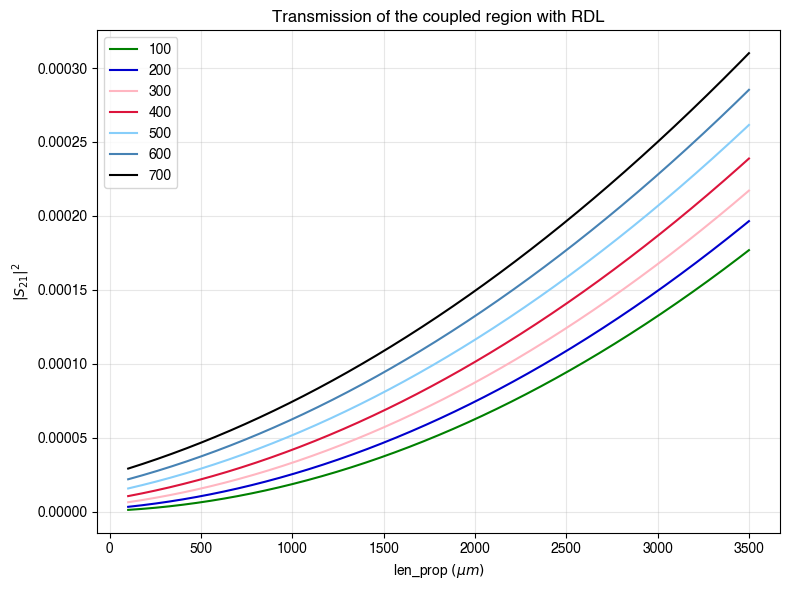

In [24]:
colors_list = ['green','mediumblue','LightPink','crimson','lightskyblue','steelblue','black']*2
param_dict = {  "Y_legends"     : np.array(file_list)[:,0],
                "X_label"       : r"len_prop $(\mu m)$",
                "Y_label"       : r"$|S_{21}|^2$",
                "title"         : r"Transmission of the coupled region with RDL",
                "figsize"       : (8,6),
                "marker_list"   : [""]*15,
                "linestyle_list": ["-"]*15,
                "colors_list"   : colors_list,
                # "xticks"        : xticks,
                # "xtickslabel"   : np.flip(xtickslabels),
                # "yticks"        : yticks,
                # "xlim"          : (-Max_M_idx*M,(Max_M_idx)*M+1),
                # "ylim"          : (-2500,3000),
                # "AD_region_color"    : True,
                # "bbox_legend"   : (0.9,0.9),
                # "text"          : text,
                # "linespacing"   : 1.5,
                # "loc_text"      : (0.6,0.1)}
}

Plot_curve((np.c_[np.array(df_data.iloc[:,0]),np.array(df_data.iloc[:,1:])],),**param_dict)